### DATA FIITING AND SCIPY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# We use Pandas.DF

df = pd.read_csv("/home/jdiego/Downloads/books.dat", sep = "\s+")


# Get data into arrays
pages = np.array(df["Pages"]) # in units of pages
thick = np.array(df["Thickness"]) # in units of mm

#print(thick)

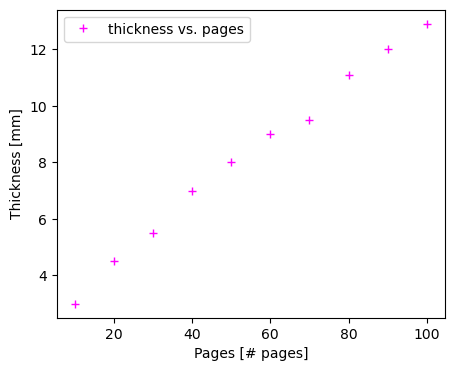

In [3]:
# Figure environment
plt.figure(figsize = (5,4))

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

In [7]:
import scipy.stats as st
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(pages, thick)

# 2. Pearson coefficient
pe = st.pearsonr(pages, thick)

#print("Spearman:\n", sp)

#print("Pearson:\n", pe)

In [5]:
m, b = np.polyfit(pages, thick, 1)  #np.polyfit() returns the coefficients m and b from Y = M(X) + B 
                                
# Print to check
print('slope =', m, ' intercept=', b)

# Get fitting function
fit_thick = m*pages + b

slope = 0.10793939393939396  intercept= 2.3133333333333312


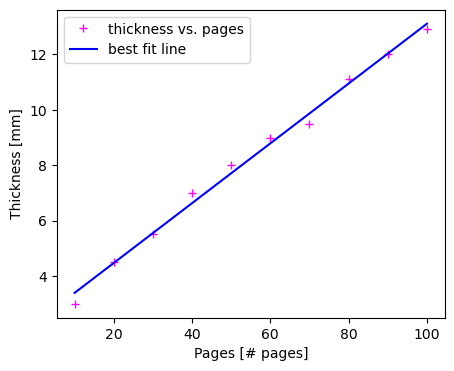

In [6]:
# replot  the data with the fit

# Figure environment
plt.figure(figsize = (5,4))

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick, color = "blue",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

### Regressions Using SciPy Functions: 

In [8]:
# Importing Scipy 
import scipy.optimize as opt

In [9]:
# Defning the function: 

def fit_functions (x,m,b):
    '''
    INPUT: Recieves the varable (data vecotr) X, the slope m and the intecept value b
    OUTPUT: Returns a linear function
    '''
    
    y_values = m*x + b 
    
    return y_values

In [10]:
#Call the curve_fit() functions

coef,cova = opt.curve_fit(fit_functions,pages,thick)

#print(coef ,cova )   This are the convariant matrix and the fitting parameters


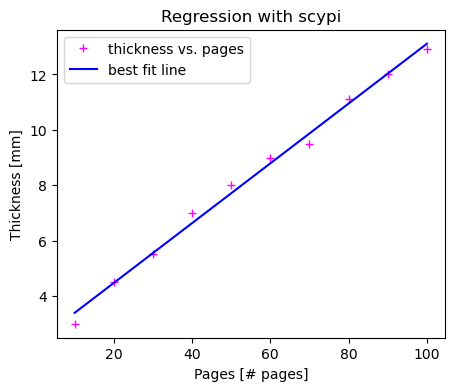

In [18]:
# replot  the data with the fit
fit_thick_2 = fit_functions(pages,*coef)
# Figure environment
plt.figure(figsize = (5,4))

plt.title('Regression with scypi')

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick_2, color = "blue",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

### EXERCISE 105_FREE FALL AND PENDULUM:

In [22]:
# gettin the data into DataFrame

df_1 = pd.read_csv("/home/jdiego/Downloads/data_freefall.csv", sep= ',')

#Reading the columns and getting keys:

keys = df_1.keys()

#print(keys)

time = df_1['Time (s)']
position = df_1['Position (m)']

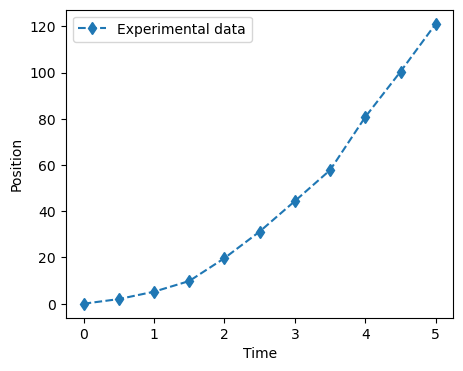

In [29]:
#plotting: 

fig = plt.figure(figsize= (5,4))

plt.plot(time,position, linestyle ='--',marker = 'd',label = 'Experimental data')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

#### Evaluate monotonic behaviour and linearlity: 

In [30]:
import scipy.stats as st
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(time, position)

# 2. Pearson coefficient
pe = st.pearsonr(time, position)

print("Spearman:\n", sp)

print("Pearson:\n", pe)

Spearman:
 SignificanceResult(statistic=1.0, pvalue=0.0)
Pearson:
 PearsonRResult(statistic=0.9626893939403707, pvalue=2.076326993227384e-06)


In [ ]:
#Making the model to fit in: 

